## Observations and Insights 

In [ ]:
#1 Capulomin and Ramicane had noticeably lower IQR's than Infubinol and Ceftamin with regards to mice's final tumor measurements 
#2 Capulomin did show a modest rate of decreased tumor volume over time
#3 Mouse weight shows a very strong positive correlation to average tumor volume 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = (r"C:\Users\13106\Desktop\bootcamp\Power_of_Plots\Power_of_Plots/Mouse_metadata.csv")
study_results_path = (r"C:\Users\13106\Desktop\bootcamp\Power_of_Plots\Power_of_Plots/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [90]:
# Combine the data into a single dataset, preview combo_data
combo_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
combo_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice.
mcount = 0
m_unique = []
for x in range(0, len(combo_data['Mouse ID'])): 
    
    if combo_data['Mouse ID'][x] not in m_unique:  
        
        m_unique.append(combo_data['Mouse ID'][x]) 
          
        mcount += 1
mcount

249

In [92]:
# remove the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combo_data2 = combo_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')
combo_data2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking the number of mice in the clean DataFrame-> which equals length 
combo_data2['Mouse ID'].value_counts()

k210    10
t565    10
g497    10
z969    10
a262    10
        ..
f932     1
x226     1
v199     1
o848     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [94]:
#sort by tumor volume so that median value is correct 
combo_data2_sort = combo_data2.sort_values(["Tumor Volume (mm3)"], ascending=True)
combo_data2_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#identify drug regimens using groupby
dreg_grouped = combo_data2_sort.groupby(["Drug Regimen"])

In [96]:
#create variable to capture total tumor volume for each regimen 
tvolume = dreg_grouped["Tumor Volume (mm3)"].sum()
#find mean of each regimen
regmean = dreg_grouped["Tumor Volume (mm3)"].mean()
#median
regmedian = dreg_grouped["Tumor Volume (mm3)"].median()
#variance
regvari = dreg_grouped["Tumor Volume (mm3)"].var()
#standard deviation
regstd = dreg_grouped["Tumor Volume (mm3)"].std()
#SEM
regsem = dreg_grouped["Tumor Volume (mm3)"].sem()

In [97]:
#create summary stats dataframe 
sum_stats = pd.DataFrame({"Mean": regmean, "Median":regmedian, "Variance":regvari, "Standard Deviation": regstd, "SEM": regsem})
sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
#groupby drug regimen and .count for datapoints
dreg_dps = combo_data2.groupby(["Drug Regimen"]).count()["Mouse ID"]
dreg_dps

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

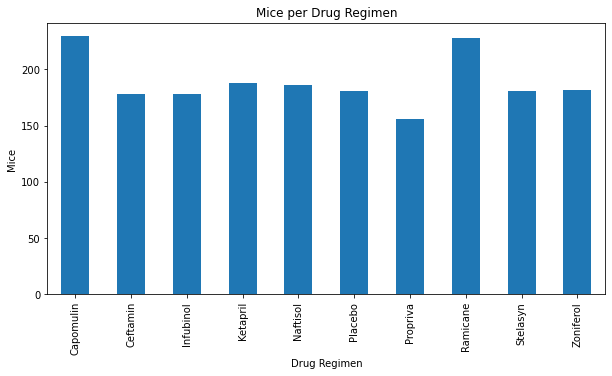

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
dreg_dps.plot(kind="bar", figsize=(10, 5))

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()

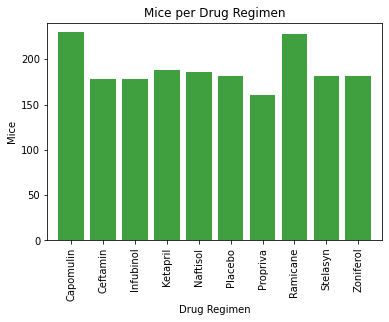

In [100]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#x axis = length of dreg_dps
x_axis = np.arange(len(dreg_dps))

plt.bar(x_axis, users, color='g', alpha=0.75, align='center')
#tick locations as datapoints 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()


In [101]:
#groupy mouse id and sex to get unique datapoints 
groupby_gen = combo_data.groupby(["Mouse ID","Sex"])
groupby_gen
mice_gen_df = pd.DataFrame(groupby_gen.size())
#Create dataframe
mice_gen = pd.DataFrame(mice_gen_df.groupby(["Sex"]).count())
mice_gen.columns = ["Total Count"]
mice_gen

,Total Count
Sex,
Female,124
Male,125


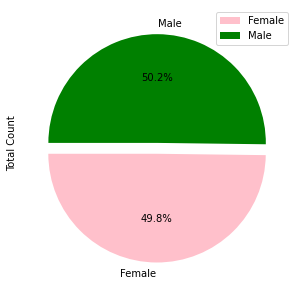

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'green']
explode = (0.1, 0)
plot = mice_gen.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=180, explode = explode, autopct="%1.1f%%")

(-1.1007415699207657,
 1.1016946163825478,
 -1.2067664421469415,
 1.1059346302803437)

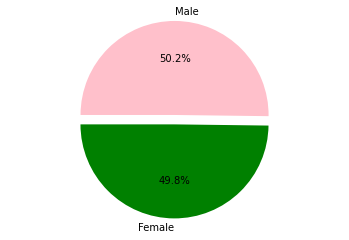

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Labels for sections of the pie chart
labels = ["Female","Male"]

#List values of each section of the pie chart
sizes = [49.799197,50.200803]

#colors for each section of the pie chart
colors = ['green', 'pink']

#Create the pie chart based on values
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#get the 4 regimenes from the data frame 
four_regs = combo_data[combo_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_regs = four_regs.sort_values(["Timepoint"], ascending=True)
four_regs
four_regs_data = four_regs[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
four_regs_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


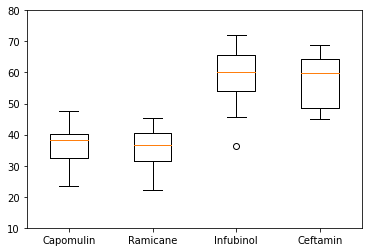

In [105]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
four_regs_sort = four_regs_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
#turn it into a dataframe
four_regs_df = four_regs_sort.to_frame()
four_regs_df
# Create empty list to fill with tumor vol data (for plotting)
four = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = four_regs_df.reset_index()
t_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
t_list_df = pd.DataFrame(t_lists)
t_list_df = t_list_df.reindex(four)
t_vols = [vol for vol in t_list_df['Tumor Volume (mm3)']]
plt.boxplot(t_vols, labels=four)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

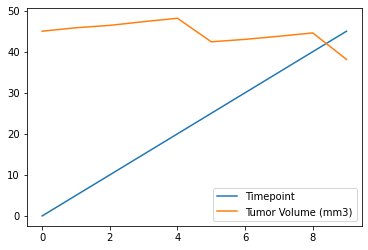

In [106]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumor = combo_data[combo_data["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

lplot_df = time_vs_tumor_data.reset_index()
lplot_df

lp_final = lplot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
lp_final

lines = lp_final.plot.line()

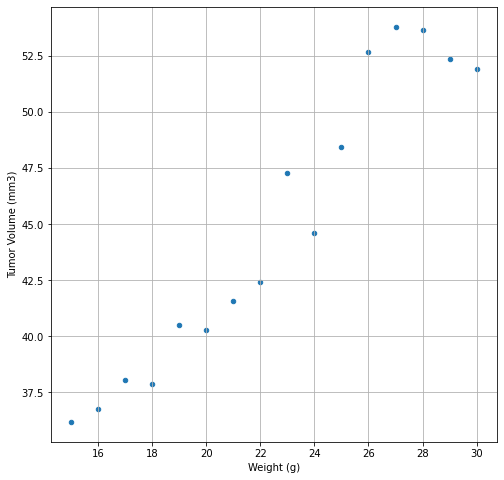

In [107]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_scatter = combo_data[combo_data["Drug Regimen"].isin(["Capomulin"])]

cap_scatter_df = four_regs[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

cap_sort = cap_scatter_df.sort_values(["Weight (g)"], ascending=True)

cap_scatter_plot = cap_scatter.reset_index()

cap_grouped_weight = cap_scatter_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

cap_grouped_plot = pd.DataFrame(cap_grouped_weight).reset_index()

cap_scatter = cap_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

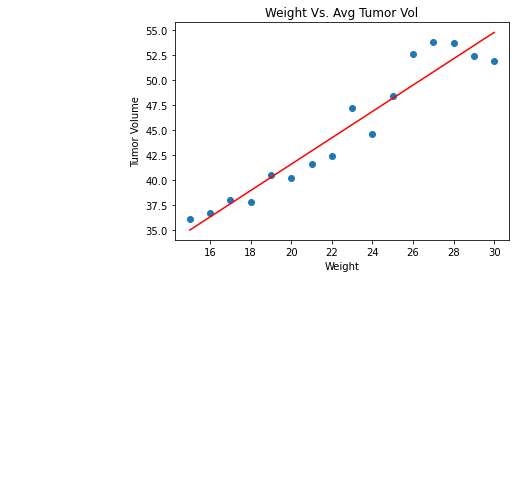

In [108]:
# Calculate the correlation coefficient and linear regression model 
x_values = cap_grouped_plot["Weight (g)"]
y_values = cap_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="pink")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()